In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels as sms
import statsmodels.formula.api as smf

In [2]:
revised_data_us_zips=pd.read_csv("revised_data_us_zips.csv")
revised_loopnet_data_ca = pd.read_csv("revised_loopnet_data_ca.csv")

merged = pd.merge(left = revised_loopnet_data_ca, right = revised_data_us_zips, left_on = "zip" ,
                   right_on ="zip", how = "outer")
merged

,id_x,zip,address,price_usd,size_sf,no_stories,property_type,year_built,year_renovated,parking_ratio,...,gross_rent_multiplier,id_y,city,state_id,state_name,density,county_name,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1.0,90066,"4077 McLaughlin Ave, Los Angeles, CA 90066 - M...",3895000,8156,2,Multifamily,1964,\N,1.72,...,14.35,30059,Los Angeles,CA,California,4642,Los Angeles,NaN,NaN,NaN
1,14.0,90066,"3451 Beethoven St, Los Angeles, CA 90066 - Mul...",2000000,2700,2,Multifamily,1961,\N,1.11,...,18,30059,Los Angeles,CA,California,4642,Los Angeles,NaN,NaN,NaN
2,67.0,90066,"3814 Lyceum Ave, Los Angeles, CA 90066 - Multi...",1395000,1624,1,Multifamily,1953,\N,\N,...,\N,30059,Los Angeles,CA,California,4642,Los Angeles,NaN,NaN,NaN
3,74.0,90066,"4417 Campbell Dr, Los Angeles, CA 90066 - Mult...",2350000,3646,2,Multifamily,1928,1990,1.1,...,13.46,30059,Los Angeles,CA,California,4642,Los Angeles,NaN,NaN,NaN
4,161.0,90066,"3611 S Centinela Ave, Los Angeles, CA 90066 - ...",4150000,7266,2,Multifamily,1988,\N,2.2,...,16.2,30059,Los Angeles,CA,California,4642,Los Angeles,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11904,NaN,99923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,33117,Hyder,AK,Alaska,0.3,Prince of Wales-Hyder,NaN,NaN,NaN
11905,NaN,99925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,33118,Klawock,AK,Alaska,6.3,Prince of Wales-Hyder,NaN,NaN,NaN
11906,NaN,99926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,33119,Metlakatla,AK,Alaska,4.8,Prince of Wales-Hyder,NaN,NaN,NaN
11907,NaN,99927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,33120,Point Baker,AK,Alaska,0,Prince of Wales-Hyder,NaN,NaN,NaN


In [3]:
merged=merged.replace(to_replace="\\N",value=np.nan)
merged.replace([np.inf, -np.inf], np.nan, inplace = True)
merged.drop(["Unnamed: 7","Unnamed: 8","Unnamed: 9","year_renovated"],
        axis=1,inplace=True)
merged.dropna(inplace = True)

merged

,id_x,zip,address,price_usd,size_sf,no_stories,property_type,year_built,parking_ratio,no_units,lot_size_ac,building_class,cap_rate,gross_rent_multiplier,id_y,city,state_id,state_name,density,county_name
0,1.0,90066,"4077 McLaughlin Ave, Los Angeles, CA 90066 - M...",3895000,8156,2,Multifamily,1964,1.72,10,0.16,B,4.88,14.35,30059,Los Angeles,CA,California,4642,Los Angeles
4,161.0,90066,"3611 S Centinela Ave, Los Angeles, CA 90066 - ...",4150000,7266,2,Multifamily,1988,2.2,9,0.15,B,3.98,16.2,30059,Los Angeles,CA,California,4642,Los Angeles
15,927.0,90066,"12747 Mitchell Ave, Los Angeles, CA 90066 - Mu...",2195000,3062,1,Multifamily,1962,1.96,5,0.16,C,3,22.88,30059,Los Angeles,CA,California,4642,Los Angeles
54,166435.0,90066,"4320 S Centinela Ave, Los Angeles, CA 90066 - ...",7995000,21268,3,Multifamily,1990,0.71,15,0.24,B,3.45,16.92,30059,Los Angeles,CA,California,4642,Los Angeles
58,168418.0,90066,"11411 Washington Pl, Los Angeles, CA 90066 - M...",1600000,3000,2,Multifamily,1952,1.33,4,0.11,C,3.26,18.28,30059,Los Angeles,CA,California,4642,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8625,166269.0,91501,"550 E Providencia Ave, Burbank, CA 91501 - Mul...",2300000,5768,2,Multifamily,1977,0.87,5,0.16,C,3.53,18.8,30250,Burbank,CA,California,1996.1,Los Angeles
8626,166270.0,91501,"603 S 6th St, Burbank, CA 91501 - FULLY RENOVA...",999000,2026,1,Multifamily,1948,1.48,2,0.16,C,4.52,16.17,30250,Burbank,CA,California,1996.1,Los Angeles
8893,164355.0,90270,"5418 Gifford Ave, Maywood, CA 90270 - Multifam...",795000,1728,1,Multifamily,1936,3.47,3,0.14,C,5.75,13.52,30095,Maywood,CA,California,8350.2,Los Angeles
8905,175530.0,90240,"7348-7350 Florence Avenue, Downey, CA 90240 - ...",5500000,15576,2,Multifamily,1960,2.57,20,0.94,C,4.08,14.5,30080,Downey,CA,California,3464.1,Los Angeles


In [4]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 0 to 9060
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_x                   692 non-null    float64
 1   zip                    692 non-null    int64  
 2   address                692 non-null    object 
 3   price_usd              692 non-null    object 
 4   size_sf                692 non-null    object 
 5   no_stories             692 non-null    object 
 6   property_type          692 non-null    object 
 7   year_built             692 non-null    object 
 8   parking_ratio          692 non-null    object 
 9   no_units               692 non-null    object 
 10  lot_size_ac            692 non-null    object 
 11  building_class         692 non-null    object 
 12  cap_rate               692 non-null    object 
 13  gross_rent_multiplier  692 non-null    object 
 14  id_y                   692 non-null    int64  
 15  city 

In [5]:
merged.isnull().sum()

id_x                     0
zip                      0
address                  0
price_usd                0
size_sf                  0
no_stories               0
property_type            0
year_built               0
parking_ratio            0
no_units                 0
lot_size_ac              0
building_class           0
cap_rate                 0
gross_rent_multiplier    0
id_y                     0
city                     0
state_id                 0
state_name               0
density                  0
county_name              0
dtype: int64

In [6]:
df=merged.copy()
df.iloc[:,3:6]=df.iloc[:,3:6].astype('float')
df.iloc[:,7:11]=df.iloc[:,7:11].astype('float')
df.iloc[:,12:14]=df.iloc[:,12:14].astype('float')
df.iloc[:,18]=df.iloc[:,18].astype('float')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 0 to 9060
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_x                   692 non-null    float64
 1   zip                    692 non-null    int64  
 2   address                692 non-null    object 
 3   price_usd              692 non-null    float64
 4   size_sf                692 non-null    float64
 5   no_stories             692 non-null    float64
 6   property_type          692 non-null    object 
 7   year_built             692 non-null    float64
 8   parking_ratio          692 non-null    float64
 9   no_units               692 non-null    float64
 10  lot_size_ac            692 non-null    float64
 11  building_class         692 non-null    object 
 12  cap_rate               692 non-null    float64
 13  gross_rent_multiplier  692 non-null    float64
 14  id_y                   692 non-null    int64  
 15  city 

# XGBoost Regression

In [8]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [9]:
y = df[['price_usd']]
x = df[['size_sf', 'no_stories','year_built','parking_ratio','no_units', 
                     'lot_size_ac','cap_rate', 'gross_rent_multiplier', 'density']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [10]:
xgbmodel = xgb.XGBRegressor()
xgbmodel.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [11]:
preds = xgbmodel.predict(x_test)
print("Score: ", xgbmodel.score(x,y))

Score:  0.9759423943717134


In [12]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print('R2 Value:',r2_score(y_train, xgbmodel.predict(x_train)))
preds = preds.reshape(173,1)
print('Accuracy',100- (np.mean(np.abs((y_test - preds) / y_test)) * 100))

RMSE: 1553999.584621
R2 Value: 0.9999912824562118
Accuracy price_usd    76.641848
dtype: float64


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_usd'>

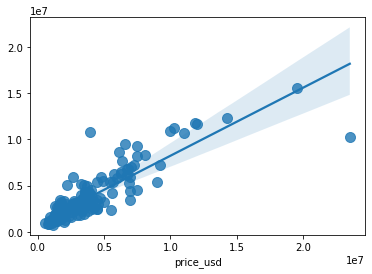

In [13]:
#plt.figure(figsize = (12, 8))
sns.regplot(y_test, preds, fit_reg=True, scatter_kws={"s": 100})

In [14]:
df_dmatrix = xgb.DMatrix(data=x,label=y)

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=df_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

[18:36:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,5838869.3,620275.107249,5555222.55,2.112566e+06
1,5471276.1,574866.877787,5251443.10,2.191704e+06
2,5141742.1,569337.699029,5013158.00,2.209179e+06
3,4850405.9,525265.697608,4830204.55,2.266057e+06
4,4536452.0,495388.765395,4569984.05,2.293244e+06


In [15]:
print((cv_results["test-rmse-mean"]).tail(1))

49    2.720894e+06
Name: test-rmse-mean, dtype: float64


The RMSE for the price prediction has reduced as compared to last time and came out to be around 2.720894e+06.

In [16]:
xgb_reg = xgb.train(params=params, dtrain=df_dmatrix, num_boost_round=10)

[18:36:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


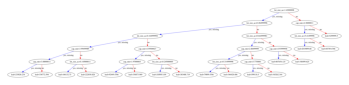

<Figure size 7500x4500 with 0 Axes>

In [17]:
from sklearn.tree import plot_tree
xgb.plot_tree(xgb_reg, num_trees=0)
plt.figure(figsize=(50, 30), dpi=150)
plt.show()

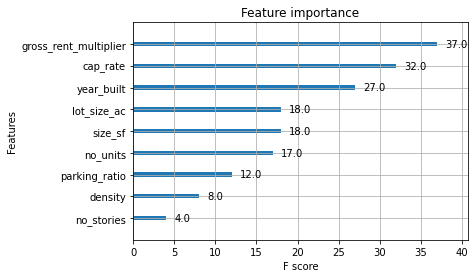

In [18]:
xgb.plot_importance(xgb_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

The feature "gross_rent_multiplier" has been given the highest importance score among all the features.

# Find the Undervalued Assets

In [23]:
df2 = merged.copy()
df2.iloc[:,3:6]=df2.iloc[:,3:6].astype('float')
df2.iloc[:,7:11]=df2.iloc[:,7:11].astype('float')
df2.iloc[:,12:14]=df2.iloc[:,12:14].astype('float')
df2.iloc[:,18]=df2.iloc[:,18].astype('float')

predictions_all = xgbmodel.predict(df2[['size_sf', 'no_stories','year_built','parking_ratio','no_units', 
                     'lot_size_ac','cap_rate', 'gross_rent_multiplier', 'density']])

df2["pre"] = predictions_all.tolist()
df2["res"] = df2["pre"] - df2["price_usd"]

df2 = df2.sort_values(by=["res"], ascending=True)

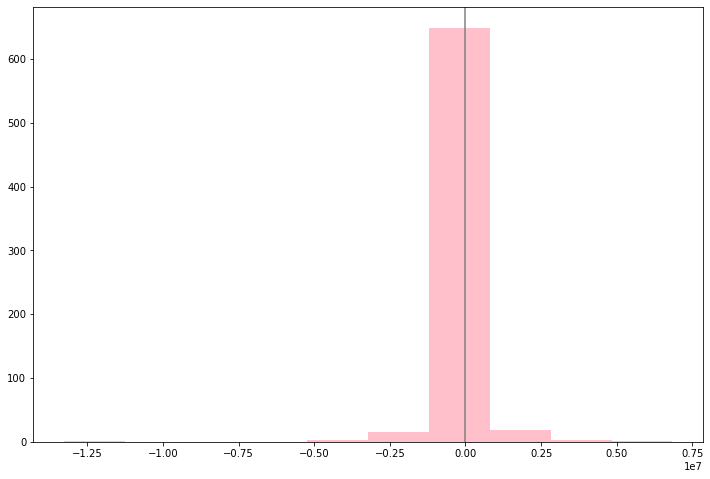

In [24]:
plt.figure(figsize = (12, 8))
plt.hist(df2.res, color = 'pink')
plt.axvline(x=0, color= 'grey')

In [25]:
df2.head(5)

,id_x,zip,address,price_usd,size_sf,no_stories,property_type,year_built,parking_ratio,no_units,...,cap_rate,gross_rent_multiplier,id_y,city,state_id,state_name,density,county_name,pre,res
2575,104507.0,90025,"1303 Wellesley Ave, Los Angeles, CA 90025 - Mu...",23500000.0,37000.0,5.0,Multifamily,2012.0,1.30,25.0,...,3.74,17.39,30026,Los Angeles,CA,California,7045.4,Los Angeles,10224816.0,-13275184.0
4987,166557.0,90604,"14829 Mulberry Dr, Whittier, CA 90604 - Mulber...",19500000.0,52231.0,2.0,Multifamily,1986.0,1.15,64.0,...,3.56,15.78,30125,Whittier,CA,California,3888.1,Los Angeles,15544168.0,-3955832.0
122,2558.0,90069,"914-924 W Knoll Dr, West Hollywood, CA 90069 -...",9000000.0,15480.0,2.0,Multifamily,2005.0,1.03,6.0,...,3.83,17.28,30062,West Hollywood,CA,California,3694.5,Los Angeles,5368868.5,-3631131.5
8458,166122.0,90293,"8517-8527 Pershing Dr, Playa Del Rey, CA 90293...",6995000.0,13440.0,2.0,Multifamily,1953.0,0.74,16.0,...,3.54,15.31,30105,Playa Del Rey,CA,California,1719.1,Los Angeles,3443830.5,-3551169.5
2254,66.0,90210,"340 N Palm Dr, Beverly Hills, CA 90210 - Multi...",5500000.0,10860.0,3.0,Multifamily,1958.0,1.10,8.0,...,2.06,30.99,30072,Beverly Hills,CA,California,736.5,Los Angeles,2321375.5,-3178624.5
